# API de sciki-learn et modèles customisés

*scikit-learn* est devenu le module incontournable quand il s'agit de machine learning. Cela tient en partie à son API épurée qui permet à quiconque d'implémenter ses propres modèles tout permettant à *scikit-learn* de les manipuler comme s'il s'agissait des siens.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

Cette présentation détaille l'API de *scikit-learn*, aborde la mise en production avec [pickle](https://docs.python.org/3/library/pickle.html), montre un exemple d'implémentation d'un modèle customisé appliqué à la sélection d'arbres dans une forêt aléatoire.

In [2]:
import matplotlib.pyplot as plt
from jupytalk.pres_helper import show_images

## Design et API

On peut penser que deux implémentations du même algorithme se valent à partir du moment où elles produisent les mêmes résultats. Voici deux chaises, vers laquelle votre instinct vous poussera-t-il ?

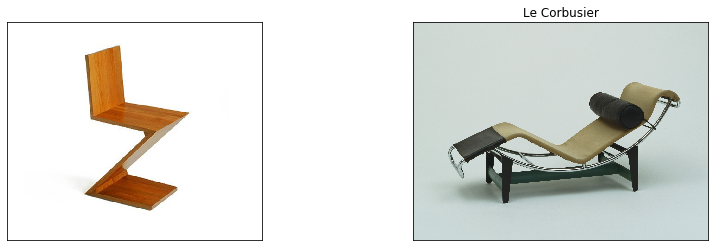

In [3]:
show_images("zigzag.jpg", "chaise.jpg", figsize=(14, 4), title2="Le Corbusier");

### Quatre ou cinq librairies ont fait le succès de Python

* [numpy](https://numpy.org/): calcul matriciel - existait avant Python ([matlab](https://en.wikipedia.org/wiki/MATLAB), R, ...)
* [pandas](https://pandas.pydata.org/): manipulation de données - existait avant Python ([R](https://www.r-project.org/), ...)
* [matplotlib](https://matplotlib.org/): graphes - existait avant Python - ([matlab](https://en.wikipedia.org/wiki/MATLAB), [R](https://www.r-project.org/)...)
* [scikit-learn](https://scikit-learn.org/stable/): machine learning - **innovation : design**
* [jupyter](https://jupyter.org/): notebooks - **innovation : mélange interactif code, texte, images**

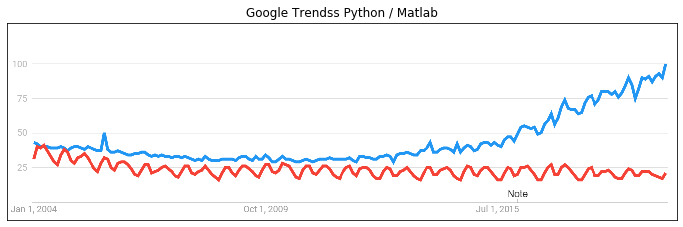

In [4]:
show_images("trends.png", title1="Google Trendss Python / Matlab");

### Machine learning résumé

* Modèle de machine learning = résultat d'une optimisation
* Cette optimisation dépend de paramètres (dimension, pas du gradient, ...)
* Optimisation = apprentissage
* On s'en sert pour faire de la prédiction.

### Ce que les codeurs imaginent

Des designs souvent très jolis mais à usage unique.

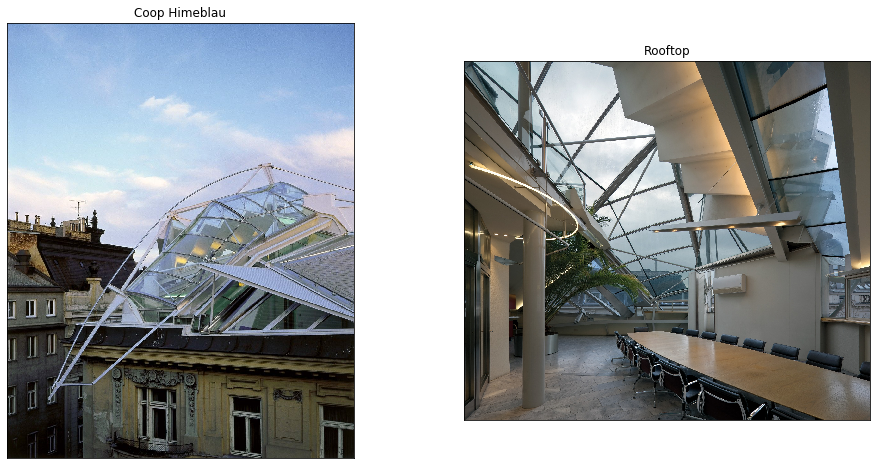

In [5]:
show_images("coop.jpg", "coop2.jpg", title1="Coop Himeblau", title2="Rooftop", figsize=(16,8));

### Vues incompatibles

* Les chercheurs aiment l'innonvation, cherchent de nouveaux modèles.
* Les datascientist assemblent des modèles existants.
* L'estimation d'un modèle arrivent à la toute fin.

**On retient facilement ce qui est court et qui se répète.**

### Vocabulaire scikit-learn

* **Predictor** : modèle de machine learning qu'on apprend (``fit``) et qui prédit (``predict``)
* **Transformer** : prétraitement de données qui précède un prédicteur, qu'on apprend (``fit``) et qui transforme les données (``transform``)

### Utilisation de classes : predictor

```
class Predictor:

    def __init__(self, **kwargs):
        # kwargs sont les paramètres d'apprentissage
        
    def fit(self, X, y):
        # apprentissage
        return self
        
    def predict(self, X):
        # prédiction
```

### Utilisation de classes : transformer

```
class Transformer:

    def __init__(self, **kwargs):
        # kwargs sont les paramètres d'apprentissage
        
    def fit(self, X, y):
        # apprentissage
        return self
        
    def transform(self, X):
        # prédiction
```

### pipeline (sandwitch en français)

**Normalisation + ACP + Régression Logistique**

| Classe | Step 1 | Step 2  | Step 3  | Step 4  | 
|------|------|------|------|------|
| Normalizer  | ``fit(X)``  | ``X2=transform(X)``  | ``X2=transform(X)``  | ``X2=transform(X)``  |
| PCA  | .  | ``fit(X2)``  | ``X3=transform(X2)``  | ``X3=transform(X2)``  |
| LogisticRegression  | .  | .  | ``fit(X3,y)``  | ``X4=predict(X3)``  |

### En langage Python

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('norm', Normalizer()),
    ('pca', PCA()),
    ('lr', LogisticRegression())
])

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('norm', Normalizer(copy=True, norm='l2')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [8]:
prediction = pipe.predict(X_test)
prediction[:5]

array([2, 2, 0, 2, 2])

In [9]:
pipe.score(X_test, y_test)

0.6578947368421053

## Raffinement

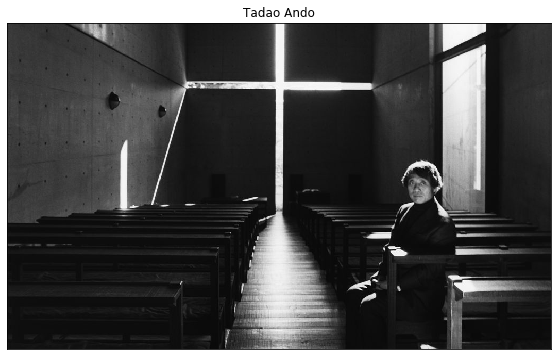

In [10]:
show_images("church-of-light-1024x614.jpg", title1="Tadao Ando", figsize=(10, 6));

### Un design commun aux régresseurs et classifieurs

* Les **régresseurs** sont les plus simples, ils modèlisent une fonction $f(X \in \mathbb{R}^d) \rightarrow  \mathbb{R}$.
* Les **classifieurs** modélisent une fonction $f(X \in \mathbb{R}^d) \rightarrow \mathbb{N}$

**Mais**

Les classifieurs sont liés à la notion de **distance** par rapport à la frontière, distance qu'on relie ensuite à une **probabilité** mais pas toujours.

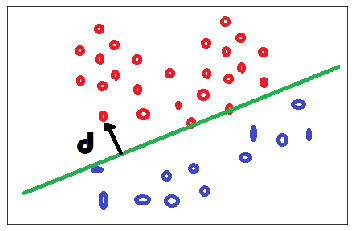

In [11]:
show_images('logreg.png');

### Besoin d'un classifieur

```
class Classifier:

    def __init__(self, **kwargs):
        # kwargs sont les paramètres d'apprentissage
        
    def fit(self, X, y):
        # apprentissage
        return self
        
    def decision_function(self, X):
        # distances
        
    def predict_proba(self, X):
        # distances --> proba
        
    def predict(self, X):
        # classes
```

### Besoin d'un régresseur par mimétisme

```
class Classifier:

    def __init__(self, **kwargs):
        # kwargs sont les paramètres d'apprentissage
        
    def fit(self, X, y):
        # apprentissage
        return self
        
    def decision_function(self, X):
        # une ou plusieurs régressions
        
    def predict(self, X):
        # moyennes
```

### Problèmes standards - moule commun

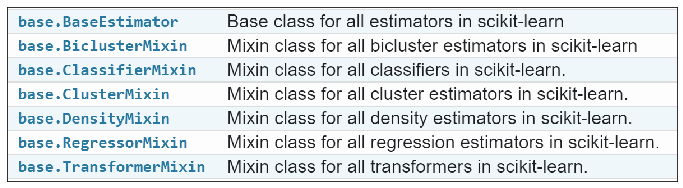

In [12]:
show_images('sklearn_base.png');

### Analyser ou prédire

Certains modèles ne peuvent pas prédire, simplement analyser. C'est le cas du [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html).

```
class NoPredictionButAnalysis:

    def __init__(self, **kwargs):
        # kwargs sont les paramètres d'apprentissage
        
    def fit_predict(self, X, y=None):
        # apprentissage et prédiction
        return self
```

### Limites du concept

Et si on veut réutiliser les sorties d'un prédicteur pour en faire autre chose ?

[VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

A suivre... dans la dernière partie.

Le design, c'est le design, le code, c'est de la bidouille.

## pickle

Un modèle c'est :

* une classe, un pipeline, une liste de traitements définis **avant** apprentissage
* des coefficients obtenus **après** apprentissage

Comment conserver le résultat ? --> [pickle](https://docs.python.org/3/library/pickle.html)

### Cas des dataframes

In [13]:
from pandas import DataFrame, read_csv
df = DataFrame(X)
df['label'] = y
df.head()

,0,1,2,3,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.to_csv("data_iris.csv")

In [15]:
%timeit read_csv("data_iris.csv")

3.01 ms ± 747 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
import pickle

In [17]:
with open("data_iris.pickle", "wb") as f:
    pickle.dump(df, f)

In [18]:
def load_from_pickle(name):
    with open(name, "rb") as f:
        return pickle.load(f)

%timeit load_from_pickle("data_iris.pickle")

528 µs ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### pickle est plus rapide

* [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) : convertit un fichier texte en dataframe --> format intermédiaire [csv](https://fr.wikipedia.org/wiki/Comma-separated_values)
* [pickle](https://docs.python.org/3/library/pickle.html) : conserve des données comme elles sont stockées en mémoire --> pas de conversion

In [19]:
from jyquickhelper import RenderJsDot
RenderJsDot('''digraph{ rankdir="LR";
    B [label="mémoire"]; C [label="csv"]; C2 [label="csv"];
    D [label="disque"]; B -> C [label="to_csv", color="red"];
    C -> D ; D -> C2 ;
    C2 -> B [label="read_csv", color="red"];
    B -> D [label="pickle.dump", color="blue"];
    D -> B [label="pickle.load", color="blue"];
}''')

### scikit-learn, pickle

unique moyen de conserver les modèles

In [20]:
with open("pipe.pickle", "wb") as f:
    pickle.dump(pipe, f)

In [21]:
with open("pipe.pickle", "rb") as f:
    pipe2 = pickle.load(f)

In [22]:
from numpy.testing import assert_almost_equal
assert_almost_equal(pipe.predict(X_test), pipe2.predict(X_test))

### Problème avec pickle

* L'état de la mémoire dépend très fortement des librairies installées
* Changer de version scikit-learn --> l'état de la mémoire est différente
* **Analogie** : pickle ne conserve que les coefficients en mémoire, ils sont cryptés en quelque sorte.
* On ne peut les décrypter qu'avec le même code.

### Dissocier les colonnes

Toutes les colonnes subissent le même traitement.

In [23]:
pipe = Pipeline([
    ('norm', Normalizer()),
    ('pca', PCA()),
    ('lr', LogisticRegression())
])

Mais ce n'est pas forcément ce que l'on veut.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

pipe2 = Pipeline([
    ('multi', ColumnTransformer([
        ('c01', Normalizer(), [0, 1]),
        ('c23', MinMaxScaler(), [2, 3]),
    ])),
    ('pca', PCA()),
    ('lr', LogisticRegression())
])

pipe2.fit(X_train, y_train);

In [25]:
from mlinsights.plotting import pipeline2dot
RenderJsDot(pipeline2dot(pipe2, X_train))

## Concepts appliqués à un nouveau régresseur

On construit une forêt d'arbres puis on réduit le nombre d'arbres à l'aide d'une régression [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Sketch de l'algorithme

In [27]:
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

# Apprentissage d'une forêt aléatoire
clr = RandomForestRegressor()
clr.fit(X_train, y_train)

# Récupération de la prédiction de chaque arbre
X_train_2 = numpy.zeros((X_train.shape[0], len(clr.estimators_)))
estimators = numpy.array(clr.estimators_).ravel()
for i, est in enumerate(estimators):
    pred = est.predict(X_train)
    X_train_2[:, i] = pred

# Apprentissage d'une régression Lasso
lrs = Lasso(max_iter=10000)
lrs.fit(X_train_2, y_train)
lrs.coef_

array([0.006992  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07288389, 0.02857078, 0.        , 0.00985623,
       0.        , 0.02125851, 0.02877546, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04058525, 0.02940571,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02747431, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00625538, 0.        , 0.01233998, 0.02087351,
       0.02702372, 0.        , 0.        , 0.01264328, 0.00101536,
       0.        , 0.        , 0.        , 0.        , 0.01107312,
       0.        , 0.        , 0.        , 0.00603594, 0.        ,
       0.0334352 , 0.        , 0.03760068, 0.01846794, 0.00961075,
       0.        , 0.        , 0.        , 0.05192393, 0.07054801,
       0.        , 0.        , 0.07571467, 0.        , 0.     

### Ce que l'on veut

```
class LassoRandomForestRegressor:

    def fit(self, X, y):
        # apprendre une random forest
        # sélectionner les arbres à garder avec un Lasso
        # supprimer les arbres associés à un poids nul
        return self
        
    def predict(self, X):
       # retourner une moyenne pondérée des prédictions
       return ...
```